In [160]:
# Let's read in the data file lans test
#install.packages('rpart')
install.packages("rpart",repos="http://cran.rstudio.com/")
library(readr)
loansTest <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)

loansTraining <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)

loansTest

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600
FALSE,0,459,8000,3600
FALSE,0,461,500,225
FALSE,0,461,6000,2700


In [161]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [162]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [163]:
install.packages("rpart",repos="http://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [164]:
library(rpart)

In [165]:
#here we want to key in on Approval 
#use the testing data
loansTraining <- rpart(Approval~., data = loansTest, cp = 0.01)

In [166]:
printcp(loansTraining)


Regression tree:
rpart(formula = Approval ~ ., data = loansTest, cp = 0.01)

Variables actually used in tree construction:
[1] Debt-to-Income Ratio FICO Score           Request Amount      

Root node error: 12424/49698 = 0.25

n= 49698 

        CP nsplit rel error  xerror       xstd
1 0.368645      0   1.00000 1.00004 3.3491e-05
2 0.128061      1   0.63135 0.63394 3.6006e-03
3 0.014174      2   0.50329 0.50748 4.1290e-03
4 0.010181      3   0.48912 0.48672 4.0221e-03
5 0.010000      4   0.47894 0.48382 3.9596e-03


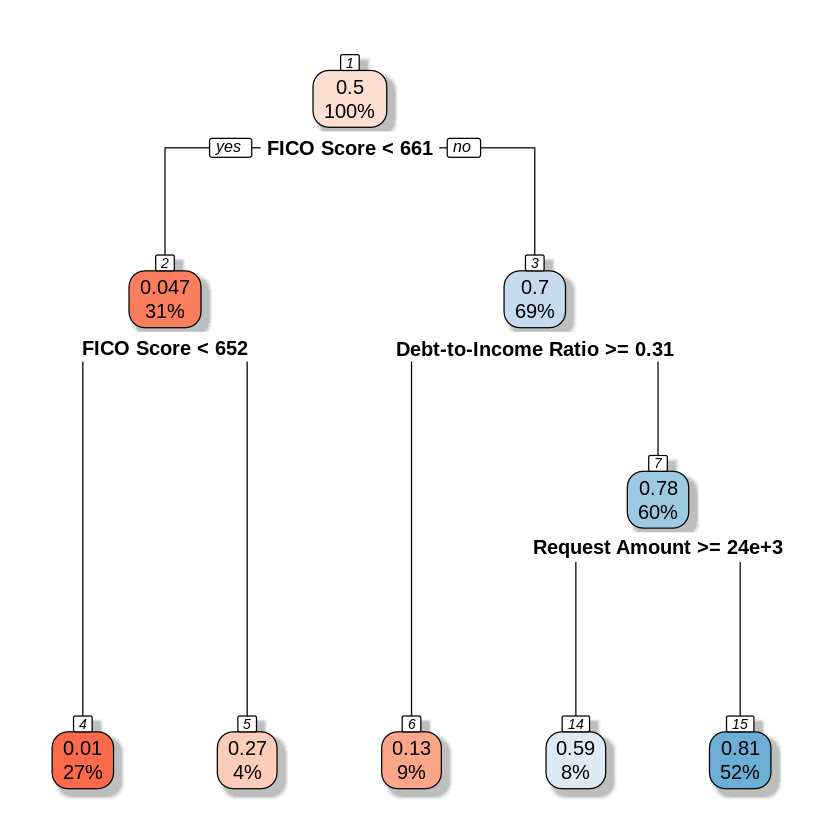

In [167]:
#https://rdrr.io/cran/rpart.plot/src/R/palette.R
#https://www.rdocumentation.org/packages/rpart/versions/4.1.16/topics/rpart

rpart.plot(loansTraining, box.palette = "RdBu", shadow.col = "gray", nn=TRUE)

In [168]:
#cart accuracy
accuracy <- sum(cart_model_prediction == loansTest$Approval) / length(cart_model_prediction)
cart_model_accuracy <- accuracy 
cat("test: " , cart_model_accuracy)

test:  0.8438167

In [182]:
 install.packages("C50")
 #install.packages("C50", repos="http://R-Forge.R-project.org") 
 library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [181]:
install.packages('party')
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [179]:
library(party)


In [180]:
#set threshold at 1000
#https://cran.r-project.org/web/packages/C50/C50.pdf
#https://rpubs.com/cyobero/C50
c5 <- C5.0(x = loansTraining[, -1], y = as.factor(loansTraining$Approval),
             control=C5.0Control(minCases=1000))
summary(c5)

ERROR: ignored

In [176]:
plot(c5)

ERROR: ignored

In [157]:
c5prediction <-predict(c5,loansTest, type = "class")

In [158]:
#c5 accuracy
accuracy <- sum(c5prediction == loansTest$Approval) / length(c5prediction)
cart_model_accuracy <- accuracy 
cat("test: " , cart_model_accuracy)

test:  0.8471568

In [ ]:
#both of the models seem to have the same accuracy